<a href="https://colab.research.google.com/github/Trading-com-Dados/material_didatico/blob/main/Varia%C3%A7%C3%A3o_Retornos_Mensais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> Plantão de dúvidas </b>

Sessão do dia 20/12/21

Dúvida apresentada pela aluna Taisa

Exemplo de como calcular a variação mensal dos retornos do bitcoin e plotar de forma agrupada 

In [1]:
!pip install python-binance

     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 43 kB 1.1 MB/s 
     |████████████████████████████████| 288 kB 43.1 MB/s 
     |████████████████████████████████| 1.1 MB 43.7 MB/s 
     |████████████████████████████████| 103 kB 40.2 MB/s 
     |████████████████████████████████| 160 kB 45.0 MB/s 
     |████████████████████████████████| 271 kB 18.5 MB/s 
     |████████████████████████████████| 192 kB 13.0 MB/s 


In [2]:
from binance.client import Client

client = Client()

In [3]:
#Buscar os dados de preço e formatar o dataframe

btcbrl = client.get_klines(symbol='BTCBRL', interval=Client.KLINE_INTERVAL_1DAY)

import json
import pandas as pd

with open('btc_df.json', 'w') as e:
  json.dump(btcbrl, e)


for line in btcbrl:
  del line [5:]


btc_df = pd.DataFrame(btcbrl, columns=['date', 'open','high', 'low', 'close'])
btc_df.set_index('date', inplace=True)
btc_df

,open,high,low,close
date,,,,
1602547200000,63606.00000000,64059.00000000,46208.00000000,63921.00000000
1602633600000,63920.00000000,64314.00000000,62677.00000000,64068.00000000
1602720000000,64068.00000000,65764.00000000,63505.00000000,65314.00000000
1602806400000,65334.00000000,65560.00000000,63650.00000000,64750.00000000
1602892800000,64600.00000000,65025.00000000,64418.00000000,64665.00000000
...,...,...,...,...
1639699200000,273412.00000000,275335.00000000,260000.00000000,262968.00000000
1639785600000,262968.00000000,269499.00000000,259301.00000000,267452.00000000
1639872000000,267453.00000000,274769.00000000,261000.00000000,267103.00000000


In [4]:
#Transformando os dados das colunas indice para data e da coluna close para numérico

btc_df.index = pd.to_datetime(btc_df.index, unit='ms')

btc_df['close'] = pd.to_numeric(btc_df['close'])



In [5]:
#Exemplo de criação de colunas com label para meses e dia do ano através dos atributos de índice

btc_df['Mes'] = btc_df.index.month
btc_df['Dia_do_Ano'] = btc_df.index.day

In [6]:
btc_df.dtypes

open           object
high           object
low            object
close         float64
Mes             int64
Dia_do_Ano      int64
dtype: object

In [7]:
import datetime
btc_df['Dia_Mes'] = btc_df.index.strftime("%d")


In [8]:
import pandas as pd

In [9]:
#Aqui iremos criar mais uma coluna com data para usá-la posteriormente

btc_df['DataCol'] = btc_df.index

In [10]:
#Aqui através da transformação do índice pegamos o primeiro dia de cada mês

primeiros = btc_df.groupby(pd.DatetimeIndex(btc_df.index).to_period('M')).nth(0)

In [11]:
#Analogamente o último dia de cada mes

ultimos = btc_df.groupby(pd.DatetimeIndex(btc_df.index).to_period('M')).nth(-1)


In [12]:
#Colocamos em um df

juntos = pd.concat([primeiros,ultimos], axis=0)

In [13]:
juntos

,open,high,low,close,Mes,Dia_do_Ano,Dia_Mes,DataCol
date,,,,,,,,
2020-10,63606.00000000,64059.00000000,46208.00000000,63921.0,10,13,13,2020-10-13
2020-11,80132.00000000,80683.00000000,79308.00000000,79875.0,11,1,01,2020-11-01
2020-12,104932.00000000,105500.00000000,96913.00000000,99124.0,12,1,01,2020-12-01
2021-01,152056.00000000,154167.00000000,150911.00000000,153480.0,1,1,01,2021-01-01
2021-02,182546.00000000,189700.00000000,179057.00000000,184276.0,2,1,01,2021-02-01
2021-03,257538.00000000,282000.00000000,256447.00000000,281400.0,3,1,01,2021-03-01
2021-04,334670.00000000,339779.00000000,330407.00000000,338489.0,4,1,01,2021-04-01
2021-05,315934.00000000,320715.00000000,313480.00000000,317708.0,5,1,01,2021-05-01
2021-06,195447.00000000,198465.00000000,185571.00000000,190204.0,6,1,01,2021-06-01


In [14]:
#classificamos para que fiquem um após o outro

juntos.sort_values(by=['date'],ascending= True, inplace=True)

In [15]:
#calculamos a variação de uma linha em relação a outra

juntos['Var_Mes'] = juntos.close.pct_change()

In [16]:
juntos.dtypes

open                  object
high                  object
low                   object
close                float64
Mes                    int64
Dia_do_Ano             int64
Dia_Mes               object
DataCol       datetime64[ns]
Var_Mes              float64
dtype: object

In [17]:
#selecionamos apenas os registros referentes aos do final do mês (maior que 20)

juntos2 = juntos.loc[juntos['Dia_Mes'] > '20']

In [18]:
juntos2

,open,high,low,close,Mes,Dia_do_Ano,Dia_Mes,DataCol,Var_Mes
date,,,,,,,,,
2020-10,78804.00000000,81693.00000000,78158.00000000,80237.0,10,31,31,2020-10-31,0.255253
2020-11,98200.00000000,106251.00000000,98200.00000000,104999.0,11,30,30,2020-11-30,0.314541
2020-12,151605.00000000,153360.00000000,147190.00000000,151825.0,12,31,31,2020-12-31,0.531667
2021-01,187500.00000000,188000.00000000,178908.00000000,182546.0,1,31,31,2021-01-31,0.189380
2021-02,263099.00000000,265600.00000000,246517.00000000,257551.0,2,28,28,2021-02-28,0.397637
2021-03,339499.00000000,343806.00000000,330100.00000000,334425.0,3,31,31,2021-03-31,0.188433
2021-04,288682.00000000,316913.00000000,286005.00000000,315831.0,4,30,30,2021-04-30,-0.066939
2021-05,188278.00000000,196776.00000000,180282.00000000,195402.0,5,31,31,2021-05-31,-0.384964
2021-06,178800.00000000,179888.00000000,171336.00000000,175718.0,6,30,30,2021-06-30,-0.100736


In [19]:
!pip install plotly

import plotly.express as px
import plotly.graph_objects as go

In [20]:
fig = go.Figure(go.Bar(
    y=juntos2['Var_Mes'],
    x=juntos2.DataCol,))
fig.update_layout(title_text='BTC_MES')
fig.show()

Gráfico simples com seaborn

In [22]:
import seaborn as sns

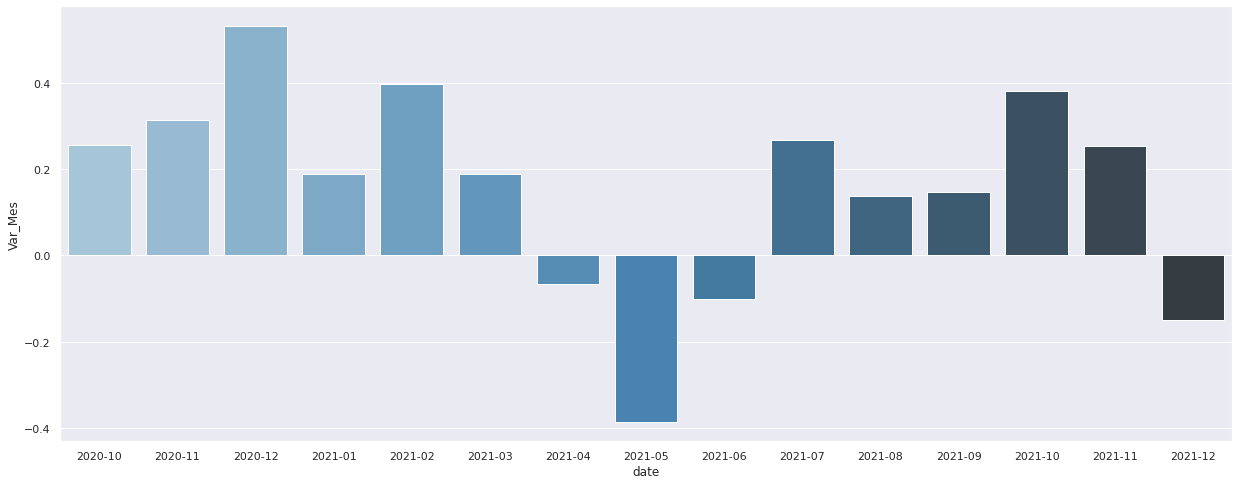

In [28]:
sns.set(rc={'figure.figsize':(21,8)})

sns.barplot(x=juntos2.index, y="Var_Mes", data=juntos2, palette="Blues_d")